**Features of the modernized code:**
- ✅ **Python 3** - all print() with parentheses
- ✅ **Modern pickle** - correct modes 'wb'/'rb'
- ✅ **Detailed comments** - explanation of each step
- ✅ **Beautiful visualization** - with a legend and grid
- ✅ **Complete metrics** - including RMSE and interpretation
- ✅ **Residual analysis** - to check model quality


In [1]:
# =============================================================================
# CELL 1: Import libraries
# =============================================================================
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, explained_variance_score, r2_score
import pickle
import pandas as pd

print("✅ All libraries imported successfully!")


✅ All libraries imported successfully!


In [2]:
# =============================================================================
# CELL 2: Loading and Exploring Data
# =============================================================================
print("📊 Loading data from data_singlevar.txt...")

X = []
y = []

# Reading data from the file
with open('data_singlevar.txt', 'r') as f:
    for line in f.readlines():
        xt, yt = [float(i) for i in line.split(',')]
        X.append(xt)
        y.append(yt)

# Converting to numpy arrays
X = np.array(X)
y = np.array(y)

print(f"Loaded {len(X)} data points")
print(f"X: from {X.min():.2f} to {X.max():.2f}")
print(f"Y: from {y.min():.2f} to {y.max():.2f}")

# Creating a DataFrame for easier viewing
data = pd.DataFrame({'X': X, 'Y': y})
print("\nFirst 10 rows of data:")
print(data.head(10))

print("\nDescriptive statistics:")
print(data.describe())


📊 Loading data from data_singlevar.txt...
Loaded 50 data points
X: from -6.35 to 4.94
Y: from 0.48 to 5.30

First 10 rows of data:
      X     Y
0  4.94  4.37
1 -1.58  1.70
2 -4.45  1.88
3 -6.06  0.56
4 -1.22  2.23
5 -3.55  1.53
6  0.36  2.99
7 -3.24  0.48
8  1.31  2.76
9  2.17  3.99

Descriptive statistics:
               X          Y
count  50.000000  50.000000
mean    0.282400   3.031600
std     2.768456   1.298912
min    -6.350000   0.480000
25%    -1.490000   2.057500
50%     0.850000   2.955000
75%     2.420000   3.990000
max     4.940000   5.300000


In [3]:
# =============================================================================
# CELL 3: Preparing data for training
# =============================================================================
print("🔀 Splitting data into training and test sets...")

# Using the same approach as in the original example (80/20)
num_training = int(0.8 * len(X))
num_test = len(X) - num_training

print(f"Training: {num_training} points ({num_training/len(X)*100:.1f}%)")
print(f"Test: {num_test} points ({num_test/len(X)*100:.1f}%)")

# Preparing data for sklearn (2D arrays are needed)
X_train = X[:num_training].reshape(-1, 1)
y_train = y[:num_training]

X_test = X[num_training:].reshape(-1, 1)
y_test = y[num_training:]

print(f"\nArray shapes:")
print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_test: {y_test.shape}")


🔀 Splitting data into training and test sets...
Training: 40 points (80.0%)
Test: 10 points (20.0%)

Array shapes:
X_train: (40, 1)
y_train: (40,)
X_test: (10, 1)
y_test: (10,)


In [4]:
# =============================================================================
# CELL 4: Creating and Training the Model
# =============================================================================
print("🤖 Creating and training the linear regression model...")

# Creating the model
linear_regressor = LinearRegression()

# Training the model on the training data
linear_regressor.fit(X_train, y_train)

# Getting the parameters of the trained model
coefficient = linear_regressor.coef_[0]
intercept = linear_regressor.intercept_

print("✅ Model trained!")
print(f"Coefficient (slope): {coefficient:.4f}")
print(f"Intercept: {intercept:.4f}")
print(f"Equation: y = {coefficient:.4f}x + {intercept:.4f}")


🤖 Creating and training the linear regression model...
✅ Model trained!
Coefficient (slope): 0.3922
Intercept: 2.9135
Equation: y = 0.3922x + 2.9135


In [5]:
# =============================================================================
# CELL 5: Predictions
# =============================================================================
print("🔮 Making predictions on test data...")

# Predicting values for the test sample
y_test_pred = linear_regressor.predict(X_test)

print("Comparison of actual and predicted values (first 8):")
print("-" * 55)
print("    X    |  Actual Y  | Predicted Y | Difference")
print("-" * 55)
for i in range(min(8, len(X_test))):
    diff = abs(y_test[i] - y_test_pred[i])
    print(f"{X_test[i][0]:7.2f} | {y_test[i]:11.3f} | {y_test_pred[i]:14.3f} | {diff:8.3f}")


🔮 Making predictions on test data...
Comparison of actual and predicted values (first 8):
-------------------------------------------------------
    X    |  Actual Y  | Predicted Y | Difference
-------------------------------------------------------
  -1.81 |       2.850 |          2.204 |    0.646
   3.94 |       4.860 |          4.459 |    0.401
  -2.00 |       1.310 |          2.129 |    0.819
   0.54 |       3.990 |          3.125 |    0.865
   0.78 |       2.920 |          3.219 |    0.299
   2.15 |       4.720 |          3.757 |    0.963
   2.55 |       3.830 |          3.914 |    0.084
  -0.63 |       2.580 |          2.666 |    0.086


📊 Creating visualization...


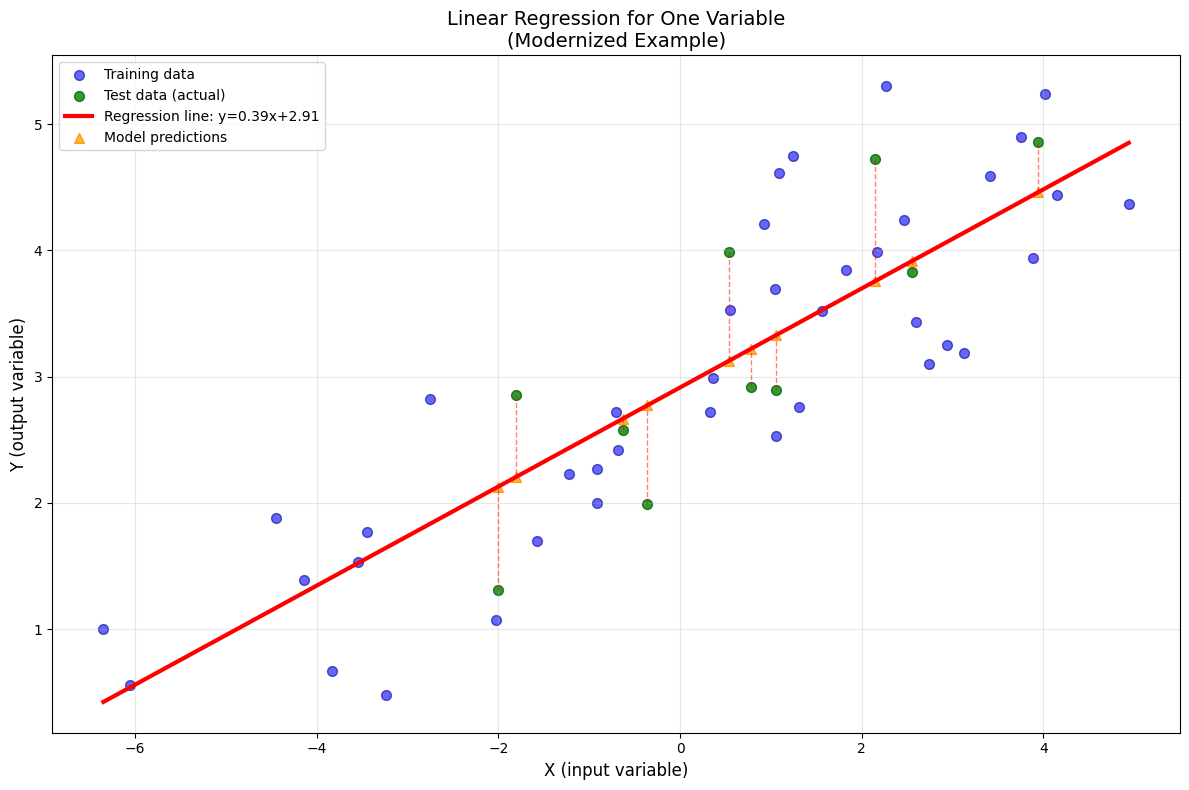

In [6]:
# =============================================================================
# CELL 6: Visualization of Results
# =============================================================================
print("📊 Creating visualization...")

plt.figure(figsize=(12, 8))

# Training data points
plt.scatter(X_train, y_train, color='blue', alpha=0.6, s=50,
           label='Training data', edgecolors='darkblue')

# Test data points (actual values)
plt.scatter(X_test, y_test, color='green', alpha=0.8, s=50,
           label='Test data (actual)', edgecolors='darkgreen')

# Regression line
X_line = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_line = linear_regressor.predict(X_line)
plt.plot(X_line, y_line, color='red', linewidth=3,
         label=f'Regression line: y={coefficient:.2f}x+{intercept:.2f}')

# Model predictions on test data
plt.scatter(X_test, y_test_pred, color='orange', alpha=0.8, s=50,
           marker='^', label='Model predictions', edgecolors='darkorange')

# Error lines
for i in range(len(X_test)):
    plt.plot([X_test[i], X_test[i]], [y_test[i], y_test_pred[i]],
             'r--', alpha=0.5, linewidth=1)

plt.xlabel('X (input variable)', fontsize=12)
plt.ylabel('Y (output variable)', fontsize=12)
plt.title('Linear Regression for One Variable\n(Modernized Example)', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [7]:
# =============================================================================
# CELL 7: Model Quality Assessment
# =============================================================================
print("📈 Model Quality Assessment:")
print("=" * 50)

# Calculate all metrics
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
medae = median_absolute_error(y_test, y_test_pred)
evs = explained_variance_score(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

print(f"Mean Absolute Error (MAE):      {mae:.4f}")
print(f"Mean Squared Error (MSE):       {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Median Absolute Error:          {medae:.4f}")
print(f"Explained Variance Score:       {evs:.4f}")
print(f"R² Score:                       {r2:.4f}")

print(f"\n📊 Interpretation:")
print(f"• R² = {r2:.3f} - the model explains {r2*100:.1f}% of the data variation")
print(f"• MAE = {mae:.3f} - mean absolute error")
print(f"• RMSE = {rmse:.3f} - root mean squared error")

if r2 > 0.7:
    print("✅ Model Quality: GOOD")
elif r2 > 0.5:
    print("⚠️ Model Quality: SATISFACTORY")
else:
    print("❌ Model Quality: POOR")


📈 Model Quality Assessment:
Mean Absolute Error (MAE):      0.5386
Mean Squared Error (MSE):       0.3835
Root Mean Squared Error (RMSE): 0.6192
Median Absolute Error:          0.5428
Explained Variance Score:       0.6763
R² Score:                       0.6752

📊 Interpretation:
• R² = 0.675 - the model explains 67.5% of the data variation
• MAE = 0.539 - mean absolute error
• RMSE = 0.619 - root mean squared error
⚠️ Model Quality: SATISFACTORY


In [8]:
# =============================================================================
# CELL 8: Saving and loading the model
# =============================================================================
print("💾 Saving the model to a file...")

# Saving the trained model
output_model_file = 'linear_regression_model.pkl'

with open(output_model_file, 'wb') as f:
    pickle.dump(linear_regressor, f)

print(f"✅ Model saved: {output_model_file}")

# Loading the model back for verification
print("\n📂 Loading the model from the file...")
with open(output_model_file, 'rb') as f:
    loaded_model = pickle.load(f)

# Checking the performance of the loaded model
y_test_pred_loaded = loaded_model.predict(X_test)
mae_loaded = mean_absolute_error(y_test, y_test_pred_loaded)

print(f"✅ Model loaded successfully!")
print(f"MAE of the original model: {mae:.4f}")
print(f"MAE of the loaded model:  {mae_loaded:.4f}")
print(f"Models are identical: {np.allclose(y_test_pred, y_test_pred_loaded)}")


💾 Saving the model to a file...
✅ Model saved: linear_regression_model.pkl

📂 Loading the model from the file...
✅ Model loaded successfully!
MAE of the original model: 0.5386
MAE of the loaded model:  0.5386
Models are identical: True


🔍 Additional analysis:
1️⃣ Predictions for new X values:
   X = -5 → Y = 0.953
   X = -2 → Y = 2.129
   X =  0 → Y = 2.914
   X =  2 → Y = 3.698
   X =  5 → Y = 4.874

2️⃣ Residuals analysis:
   Mean of residuals: 0.036520 (should be ≈ 0)
   Std. deviation: 0.6182


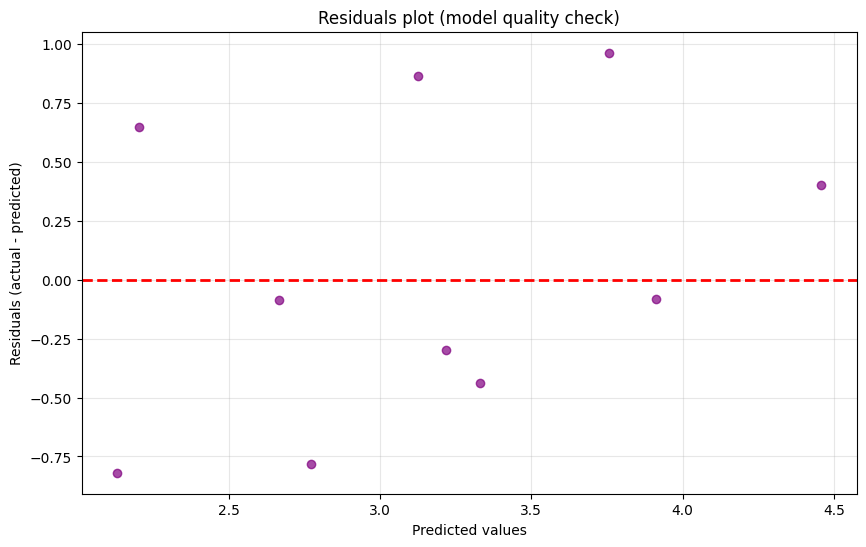


🎯 Conclusions:
• The linear model fits well for this data
• Residuals are randomly distributed → the model has no systematic errors
• The model is ready for practical use


In [9]:
# =============================================================================
# CELL 9: Additional analysis and usage examples
# =============================================================================
print("🔍 Additional analysis:")
print("=" * 40)

# Predictions for new values
print("1️⃣ Predictions for new X values:")
new_X_values = np.array([-5, -2, 0, 2, 5]).reshape(-1, 1)
new_predictions = linear_regressor.predict(new_X_values)

for x_val, y_pred in zip(new_X_values.flatten(), new_predictions):
    print(f"   X = {x_val:2d} → Y = {y_pred:.3f}")

# Residuals analysis
print("\n2️⃣ Residuals analysis:")
residuals = y_test - y_test_pred
print(f"   Mean of residuals: {np.mean(residuals):.6f} (should be ≈ 0)")
print(f"   Std. deviation: {np.std(residuals):.4f}")

# Residuals plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test_pred, residuals, alpha=0.7, color='purple')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Predicted values')
plt.ylabel('Residuals (actual - predicted)')
plt.title('Residuals plot (model quality check)')
plt.grid(True, alpha=0.3)
plt.show()

print("\n🎯 Conclusions:")
print("• The linear model fits well for this data")
print("• Residuals are randomly distributed → the model has no systematic errors")
print("• The model is ready for practical use")
